# Model regresji prostej

$$Y = \beta_0 + \beta_1 X + \epsilon,$$
gdzie $\epsilon \sim \mathcal{N}(0, \sigma)$.

**Nomenklatura:**

$Y$ - zmienna zależna, zmienna odpowiedzi, zmienna objaśniana

$X$ - zmienna niezależna, predyktor, atrybut

$\beta_0, \beta_1$ - współczynniki regregresji

$\epsilon$ - błąd losowy

**Cel:** 

Przy użyciu par  $(x_1, y_1), (x_2, y_2), \ldots (x_n, y_n)$ odpowiadającym pomiarom, odpowiednio, 
zmiennej niezależnej $X$ i zmiennej zależnej $Y$, wyznaczyć współczynniki 
$b_0, b_1$ tak, aby 
$$y_i \approx b_0 + b_1 x_i$$

**Suma błędów  kwadratów:**
    
$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 = (y_1 - \hat{y_1})^2 + (y_2 - \hat{y_2})^2 + \ldots + (y_n - \hat{y_n})^2$$

**Funkcja kryterialna:**
    
$$(b_0, b_1) = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - \hat{y_i})^2 = \arg\!\min_{(b_0, b_1)} \sum_{i=1}^n (y_i - (b_0 + b_1 x_i))^2$$

$$b_0 = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n(x_i - \overline{x})^2}$$

$$b_1 = \overline{y} - b_1\overline{x}$$

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy import stats
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pakiet [`statsmodels`](https://www.statsmodels.org/stable/genindex.html)

In [4]:
help(sm.datasets)

Help on package statsmodels.datasets in statsmodels:

NAME
    statsmodels.datasets - Datasets module

PACKAGE CONTENTS
    anes96 (package)
    cancer (package)
    ccard (package)
    china_smoking (package)
    co2 (package)
    committee (package)
    copper (package)
    cpunish (package)
    elnino (package)
    engel (package)
    fair (package)
    fertility (package)
    grunfeld (package)
    heart (package)
    interest_inflation (package)
    longley (package)
    macrodata (package)
    modechoice (package)
    nile (package)
    randhie (package)
    scotland (package)
    spector (package)
    stackloss (package)
    star98 (package)
    statecrime (package)
    strikes (package)
    sunspots (package)
    template_data
    tests (package)
    utils

FUNCTIONS
    check_internet(url=None)
        Check if internet is available
    
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
    
    get_data_home(data_home=None)
        Ret

In [5]:
#pobieranie plików z statsmodels
cancer = sm.datasets.cancer.load_pandas()

In [6]:
print(sm.datasets.cancer.DESCRSHORT)
print(sm.datasets.cancer.DESCRLONG)
print(sm.datasets.cancer.NOTE)

Breast Cancer and county population
The number of breast cancer observances in various counties
::

    Number of observations: 301
    Number of variables: 2
    Variable name definitions:

        cancer - The number of breast cancer observances
        population - The population of the county




In [7]:
cancer.data.head()

,cancer,population
0,1.0,445.0
1,0.0,559.0
2,3.0,677.0
3,4.0,681.0
4,3.0,746.0


In [ ]:
# Pobieranie zbiorow danych z R

In [8]:
carseats = sm.datasets.get_rdataset(dataname="Carseats", package="ISLR", cache=True)

In [9]:
#opis
print(carseats.__doc__)

.. container::

   ======== ===============
   Carseats R Documentation
   ======== ===============

   .. rubric:: Sales of Child Car Seats
      :name: sales-of-child-car-seats

   .. rubric:: Description
      :name: description

   A simulated data set containing sales of child car seats at 400
   different stores.

   .. rubric:: Usage
      :name: usage

   ::

      Carseats

   .. rubric:: Format
      :name: format

   A data frame with 400 observations on the following 11 variables.

   ``Sales``
      Unit sales (in thousands) at each location

   ``CompPrice``
      Price charged by competitor at each location

   ``Income``
      Community income level (in thousands of dollars)

   ``Advertising``
      Local advertising budget for company at each location (in
      thousands of dollars)

   ``Population``
      Population size in region (in thousands)

   ``Price``
      Price company charges for car seats at each site

   ``ShelveLoc``
      A factor with levels ``Bad``,

# Zadanie 1

Wczytaj zbiór `Carseats`, który zawierają dane o sprzedaży fotelików samochodowych pewnej firmy w 400 różnych lokalizacjach:

• sprzedaż jednostek (w tysiącach) w danej lokalizacji (`Sales`),

• cena sprzedaży konkurenta w danej lokalizacji (`CompPrice`),

• poziom dochodów społeczności wdanej lokalizacji w tys. dolarów (`Income`),

• wielkość populacji w danym regionie (`Population`),

• lokalny budżet reklamowy dla firmy w danej lokalizacji (`Advertising`),

• cena sprzedaży w danej lokalizacji (`Price`),

• na ile korzystne jest miejsce na półkach sklepu dla fotelików w danym regionie?
(`Shelveloc`),

• średni wiek ludności lokalnej (`Age`),

• poziom wykształcenia w każdej lokalizacji (`Education`),

• czy położenie sklepu jest w lokalizacji miejskiej? (`Urban`)

• czy sklep znajduje się w USA? (`US`)

1. Interesuje nas zależność wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży (zmienne `Sales` i `Price`). Określ zmienną zależną i niezależną, a następnie:
* Narysuj wykres rozproszenia tych zmiennych. 
* Czy zmienne te są zależne? 
* Oblicz dla nich współczynnik korelacji Pearsona. 
       
2. Wyznacz funkcję regresji wielkości sprzedaży fotelików względem ich ceny. Narysuj ją na wykresie rozproszenia.

3. Zweryfikuj dopasowanie modelu:
       a) Czy istnieje związek pomiędzy zmienną zależną a niezależną?
       b) Czy wyraz wolny jest istotny w modelu?
       c) Oblicz i zinterpretuj wartość współczynnika determinacji R2.
       d) Sprawdź, czy spełnione jest założenie o rozkładzie normalnym reszt.
       
4. Powtórz punkty 1-3 dla zależności wielkości sprzedaży fotelików samochodowych (w tys. jednostek) od ich ceny sprzedaży u konkurenta w danej lokalizacji (zmienne `Sales` i `CompPrice`).

[]

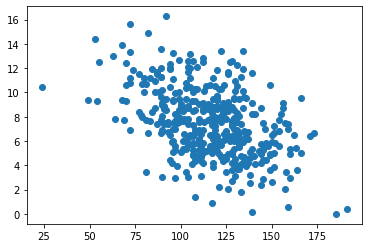

In [14]:
#1
#Zależna Sales, niezależna Price 
carseats_df = carseats.data
plt.scatter(carseats_df.Price,carseats_df.Sales)
plt.plot()
#jest zależność liniowa

In [15]:
#korelacja pearsonowska
np.corrcoef(carseats_df.Price,carseats_df.Sales)[0,1]

-0.44495072784657264

In [16]:
#Jak dopasować model do danych?
#metoda1
model = smf.ols('Sales~Price',data = carseats_df)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.62e-21
Time:                        15:25:08   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
#metoda2
carseats_df2 = sm.add_constant(carseats.data,prepend = True,has_constant = "add")
carseats_df2

X,Y = carseats_df2[['const','Price']],carseats_df2['Sales']
model2 = sm.OLS(endog = Y,exog = X)
fitted_model2 = model2.fit()
fitted_model2.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.62e-21
Time:                        15:25:11   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#metoda 3
Y,X = dmatrices('Sales~Price',data = carseats_df,return_type='dataframe')
print(Y)
print(X)
model3 = sm.OLS(endog = Y,exog = X)
fitted_model3 = model3.fit()
fitted_model3.summary()

     Sales
0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
..     ...
395  12.57
396   6.14
397   7.41
398   5.94
399   9.71

[400 rows x 1 columns]
     Intercept  Price
0          1.0  120.0
1          1.0   83.0
2          1.0   80.0
3          1.0   97.0
4          1.0  128.0
..         ...    ...
395        1.0  128.0
396        1.0  120.0
397        1.0  159.0
398        1.0   95.0
399        1.0  120.0

[400 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           7.62e-21
Time:                        15:25:14   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.000      12.398      14.886
Price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Jak wyciągać poszczególne informacje z summary?
print("Liczba obserwacji w zbiorze treningowym (No. Observations): {}".format(model3.nobs))
print("\n")

print("Liczba stopni swobody (Df Residuals): {}".format(model3.df_resid))
print("Liczba stopni swobody w modelu (Df Model): {}".format(model3.df_model))
print("\n")

print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_model3.rsquared))
print("Modyfikowany współczynnik determinacji R2 (Adj. R-squared): {}".format(fitted_model3.rsquared_adj))
print("\n")

print("Wartość statystyki testowej testu F (F-statistic): {}".format(fitted_model3.fvalue))
print("P-wartość testu F (Prob (F-statistic)): {}".format(fitted_model3.f_pvalue))
print("\n")

print("Wartość funkcji wiarogodności (Log-Likelihood): {}".format(fitted_model3.llf))
print("AIC: {}".format(fitted_model3.aic))
print("BIC: {}".format(fitted_model3.bic))
print("\n")

normaltest = stats.normaltest(fitted_model3.resid)
print("Wartość statystyki testowej testu normalności D'Angostino (Omnibus): {}". format(normaltest.statistic))
print("P-wartość testu D'Angostino (Prob(Omnibus)): {}".format(normaltest.pvalue))
print("\n")

print("Skośność (Skew): {}".format(stats.skew(fitted_model3.resid)))
print("Kurtoza (Kurtosis): {}".format(stats.kurtosis(fitted_model3.resid, fisher = False, bias = True)))
print("\n")

normaltest2 = stats.jarque_bera(fitted_model3.resid)
print("Wartość statystyki Durbina-Watsona: {}".format(durbin_watson(fitted_model3.resid)))
print("Wartość statystyki Jarque-Bera: {}".format(normaltest2[0]))
print("P-wartość testu Jarque-Bera: {}".format(normaltest2[1]))
print("Wskaźnik uwarunkowania (Cond. No): {}".format(fitted_model3.condition_number))
print("\n")

print("Wartości dopasowanych wartości parametrów regresji:")
print(fitted_model3.params)
print("\n")

print("Odchylenie standardowe dla dopasowanych estymatorów parametrów regresji:")
print(fitted_model3.HC0_se)
print("\n")

print("Wartość statystki testu t-Studenta")
print(fitted_model3.tvalues)
print("\n")

print("P-wartości testu t-Studenta")
print(fitted_model3.pvalues)
print("\n")

print("Przedział ufności dla współczynnika regresji dla wyrazu wolnego:")
print(fitted_model3.conf_int_el(0))
print("Przedział ufności dla współczynnika regresji dla zmiennej TV:")
print(fitted_model3.conf_int_el(1))

Liczba obserwacji w zbiorze treningowym (No. Observations): 400.0


Liczba stopni swobody (Df Residuals): 398.0
Liczba stopni swobody w modelu (Df Model): 1.0


Współczynnik determinacji R2 (R-squared): 0.19798115021119478
Modyfikowany współczynnik determinacji R2 (Adj. R-squared): 0.19596602747303193


Wartość statystyki testowej testu F (F-statistic): 98.2476880746692
P-wartość testu F (Prob (F-statistic)): 7.618187011915281e-21


Wartość funkcji wiarogodności (Log-Likelihood): -938.2281770407974
AIC: 1880.4563540815948
BIC: 1888.4392831758107


Wartość statystyki testowej testu normalności D'Angostino (Omnibus): 2.5367349805033097
P-wartość testu D'Angostino (Prob(Omnibus)): 0.2812904565628028


Skośność (Skew): 0.17508369947717364
Kurtoza (Kurtosis): 2.8155126928300667


Wartość statystyki Durbina-Watsona: 1.8922196901096124
Wartość statystyki Jarque-Bera: 2.61087956328777
P-wartość testu Jarque-Bera: 0.27105330456197174
Wskaźnik uwarunkowania (Cond. No): 590.7132159165595


Wartoś

### Wykres rozproszenia $x$ vs. $y$ z wyznaczoną przez model prostą regresji $y=13.6419 - 0.0531 \cdot x$

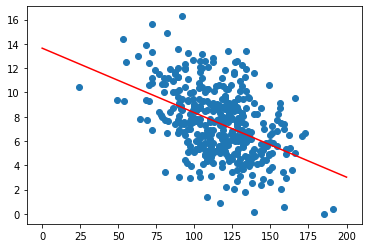

In [20]:
#2
plt.scatter(X.Price,Y.Sales)
X_plot = np.linspace(0,200,200)
#obojętnie czy weźmiemy model1 model2 czy model3 to są te same modele
plt.plot(X_plot,X_plot*fitted_model2.params[1]+fitted_model2.params[0],color = 'red')
plt.show()

In [27]:
#3
print("Wartość statystki testu t-Studenta")
print(fitted_model3.tvalues)
print("\n")
print("P-wartości testu t-Studenta")
print(fitted_model3.pvalues)
print("\n")
#obydwa blisko 0, jeśli pval małe to współczynnik istotny, więc intercept istotny (to mówi p-val intercepta) jak i jest 
#istotna zależność liniowa między zmienną niezależną i zależną (p-val Price, Price istotne w modelu)
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_model3.rsquared)) 
#może być od 0 do 1, im większy tym model lepiej dopasowany do danych, pod warunkiem, że są spełnione założenia modelu liniowego
#z reguły jak jest niski to trzeba pomyśleć co można poprawić, jak wysoki to trzeba uważać czy na pewno mamy model liniowy
print("\n")
normaltest = stats.normaltest(fitted_model3.resid)
print("Wartość statystyki testowej testu normalności D'Angostino (Omnibus): {}". format(normaltest.statistic))
print("P-wartość testu D'Angostino (Prob(Omnibus)): {}".format(normaltest.pvalue))
print("\n")
normaltest2 = stats.jarque_bera(fitted_model3.resid)
print("Wartość statystyki Jarque-Bera: {}".format(normaltest2[0]))
print("P-wartość testu Jarque-Bera: {}".format(normaltest2[1]))
#mamy normalność

Wartość statystki testu t-Studenta
Intercept    21.557620
Price        -9.911997
dtype: float64


P-wartości testu t-Studenta
Intercept    7.458712e-69
Price        7.618187e-21
dtype: float64


Współczynnik determinacji R2 (R-squared): 0.19798115021119478


Wartość statystyki testowej testu normalności D'Angostino (Omnibus): 2.5367349805033097
P-wartość testu D'Angostino (Prob(Omnibus)): 0.2812904565628028


Wartość statystyki Jarque-Bera: 2.61087956328777
P-wartość testu Jarque-Bera: 0.27105330456197174


[]

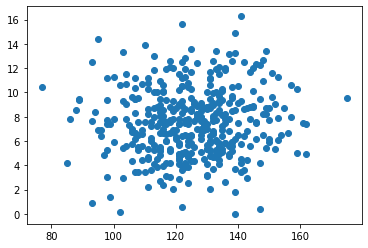

In [32]:
#4 Powtarzamy dla zmiennej Sales i CompPrice 
#Zależna Sales, niezależna CompPrice
carseats_df = carseats.data
plt.scatter(carseats_df.CompPrice,carseats_df.Sales)
plt.plot()
#brak zależności liniowej

In [33]:
#korelacja pearsonowska potwierdza brak zależności
np.corrcoef(carseats_df.CompPrice,carseats_df.Sales)[0,1]

0.06407872955062155

In [35]:
Y,X = dmatrices('Sales~CompPrice',data = carseats_df,return_type='dataframe')
model3new = sm.OLS(endog = Y,exog = X)
fitted_model3new = model3new.fit()
fitted_model3new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.641
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.201
Time:                        15:54:35   Log-Likelihood:                -981.53
No. Observations:                 400   AIC:                             1967.
Df Residuals:                     398   BIC:                             1975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0215      1.160      5.191      0.000       3.741       8.302
CompPrice      0.0118      0.009      1.281      0.201      -0.006       0.030
==============================================================================
Omnibus:                        2.567   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                2.625
Skew:                           0.191   Prob(JB):                        0.269
Kurtosis:                       2.892   Cond. No.                     1.04e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Wykres rozproszenia $x$ vs. $y$ z wyznaczoną przez model prostą regresji $y=6.0215 + 0.0118 \cdot x$

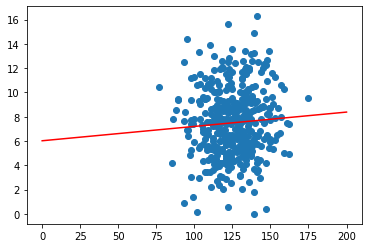

In [37]:
#2
plt.scatter(X.CompPrice,Y.Sales)
X_plot = np.linspace(0,200,200)
plt.plot(X_plot,X_plot*fitted_model3new.params[1]+fitted_model3new.params[0],color = 'red')
plt.show()

In [42]:
print("Wartość statystki testu t-Studenta")
print(fitted_model3new.tvalues)
print("\n")
print("P-wartości testu t-Studenta")
print(fitted_model3new.pvalues)
print("\n")
#dla intercepta pval jest blisko 0, zatem jest istotny, nie ma zależności między CompPrice a Sales
# bo pval >0.05, 
print("Współczynnik determinacji R2 (R-squared): {}".format(fitted_model3new.rsquared)) 
#malutki R^2 model nie jest dobrze dopasowany
print("\n")
normaltest = stats.normaltest(fitted_model3new.resid)
print("Wartość statystyki testowej testu normalności D'Angostino (Omnibus): {}". format(normaltest.statistic))
print("P-wartość testu D'Angostino (Prob(Omnibus)): {}".format(normaltest.pvalue))
print("\n")
normaltest2 = stats.jarque_bera(fitted_model3new.resid)
print("Wartość statystyki Jarque-Bera: {}".format(normaltest2[0]))
print("P-wartość testu Jarque-Bera: {}".format(normaltest2[1]))
#mamy normalność

Wartość statystki testu t-Studenta
Intercept    5.191168
CompPrice    1.280999
dtype: float64


P-wartości testu t-Studenta
Intercept    3.339763e-07
CompPrice    2.009398e-01
dtype: float64


Współczynnik determinacji R2 (R-squared): 0.004106083580821762


Wartość statystyki testowej testu normalności D'Angostino (Omnibus): 2.566804480232423
P-wartość testu D'Angostino (Prob(Omnibus)): 0.27709295814634444


Wartość statystyki Jarque-Bera: 2.625307309902451
P-wartość testu Jarque-Bera: 0.2691049962371863


# Przekształcanie zmiennej objaśniającej

# Zadanie 2
Wczytaj dane `pollution.csv` (opis danych: https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution). Dopasuj model regresji liniowej postaci: `mort~nox`. Czy model jest dobrze dopasowany do danych? Jeżeli nie, dlaczego?

In [41]:
#https://www.rdocumentation.org/packages/SMPracticals/versions/1.4-3/topics/pollution
pollution = pd.read_csv("pollution.csv")
lm1 = smf.ols('mort~nox',data = pollution).fit()
lm1.summary()
#kiepskie R^2 nie ma zależności

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3494
Date:                Wed, 08 Jun 2022   Prob (F-statistic):              0.557
Time:                        15:59:38   Log-Likelihood:                -332.28
No. Observations:                  60   AIC:                             668.6
Df Residuals:                      58   BIC:                             672.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    942.7115      9.003    104.706      0.000     924.689     960.734
nox           -0.1039      0.176     -0.591      0.557      -0.456       0.248
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.803   Jarque-Bera (JB):                0.148
Skew:                           0.115   Prob(JB):                        0.929
Kurtosis:                       3.079   Cond. No.                         57.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

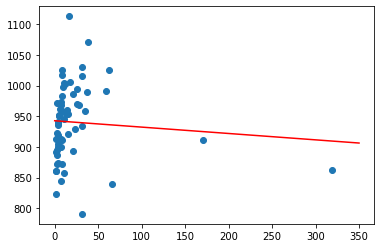

In [ ]:
plt.scatter(pollution['nox'],pollution['mort'])
X_plot = np.linspace(0,350,350)
plt.plot(X_plot,X_plot*lm1.params[1]+lm1.params[0],color = 'red')
plt.show()
#brak zależności liniowej

(array([52.,  5.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([  1. ,  32.8,  64.6,  96.4, 128.2, 160. , 191.8, 223.6, 255.4,
        287.2, 319. ]),
 <a list of 10 Patch objects>)

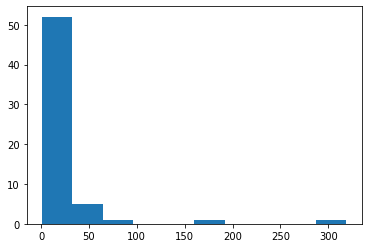

In [ ]:
plt.hist(pollution['nox']) 
#ma pojedyncze obserwacje daleko, stąd ciężko dopasować model liniowy

(array([ 3.,  7.,  9., 13.,  9.,  7.,  7.,  3.,  1.,  1.]),
 array([0.        , 0.57651911, 1.15303822, 1.72955733, 2.30607644,
        2.88259555, 3.45911466, 4.03563377, 4.61215288, 5.18867199,
        5.7651911 ]),
 <a list of 10 Patch objects>)

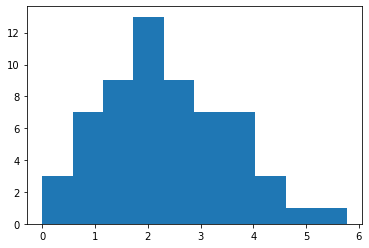

In [ ]:
plt.hist(np.log(pollution['nox']))
#przekształcenie logarytmiczne temu w tym wypadku przeciwdziała

In [43]:
lm2 = smf.ols('mort~np.log(nox)',data = pollution).fit()
lm2.summary()
# 3 razy większy R^2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     5.406
Date:                Wed, 08 Jun 2022   Prob (F-statistic):             0.0236
Time:                        16:04:50   Log-Likelihood:                -329.79
No. Observations:                  60   AIC:                             663.6
Df Residuals:                      58   BIC:                             667.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     904.7245     17.173     52.684      0.000     870.350     939.099
np.log(nox)    15.3355      6.596      2.325      0.024       2.133      28.538
==============================================================================
Omnibus:                        3.073   Durbin-Watson:                   1.589
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.270
Skew:                          -0.285   Prob(JB):                        0.321
Kurtosis:                       3.764   Cond. No.                         6.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

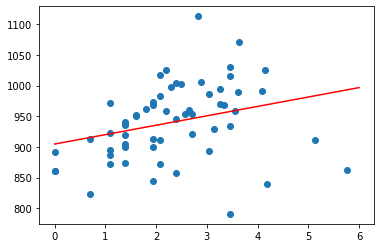

In [ ]:
plt.scatter(np.log(pollution['nox']),pollution['mort'])
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*lm2.params[1]+lm2.params[0],color = 'red')
plt.show()
#dane są bardziej liniowe

### Metoda Boxa-Coxa

Metoda Boxa-Coxa jest popularnym rozwiązaniem stosowanym do przekształcenia zmiennej. Ważnym założeniem metody jest dodatniość wszystkich wartość.
Metoda przekształca zmienną $z>0 \to t_{\lambda}(z)$, gdzie 
$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{z^{\lambda}-1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0\\
    \log(z) \quad &\text{dla} \quad \lambda= 0.
    \end{cases}\right.
$$

Wybór $\lambda$ odbywa się na podstawie metody największej wiarogodności. Funkcja wiarogodności zakłada normalność błędów i ma następującą postać:
$$
L(\lambda)=-\frac{n}{2}\log\Big(\frac{\text{RRS}_{\lambda}}{n}\Big) + (\lambda-1)\sum\log y_i,
$$
gdzie $\text{RRS}_{\lambda}$, to $\text{RRS}$ dla odpowiedzi $t_{\lambda}(z)$.

## Zadanie 2.1
Znajdź najlepszy parametr $\lambda$ dla przekształcenia zmiennej niezależnej `nox`, przekształć zmienną zgodnie z uzyskaną wartością i dopasuj model prostej regresji liniowej.

In [45]:
#co jeśli nie wiemy jakiej transformacji dokonać, a wiemy, że y>0. Użyjmy przekształcenia Boxa - Coxa
nox_boxcox = stats.boxcox(pollution['nox'])
nox_boxcox


(array([2.37212004, 2.05654847, 1.64030605, 1.87733603, 3.04902336,
        2.92857684, 2.92857684, 1.29442924, 2.20003388, 1.76816378,
        1.87733603, 3.39157611, 2.78025577, 2.6244457 , 1.97242926,
        0.        , 1.29442924, 1.87733603, 2.99164269, 1.29442924,
        0.        , 1.04037372, 1.04037372, 1.04037372, 1.48651427,
        1.76816378, 1.29442924, 1.76816378, 4.38064428, 3.03046762,
        2.50989984, 0.        , 2.69122027, 2.13188324, 2.31932321,
        1.04037372, 2.46697562, 2.78025577, 2.92857684, 3.34810063,
        2.6244457 , 1.29442924, 2.13188324, 1.97242926, 1.29442924,
        2.37212004, 3.42223536, 4.01930866, 2.92857684, 1.76816378,
        1.29442924, 1.48651427, 1.76816378, 0.66965304, 2.83354667,
        0.66965304, 2.13188324, 1.04037372, 1.87733603, 2.2622045 ]),
 -0.10007430172722796)

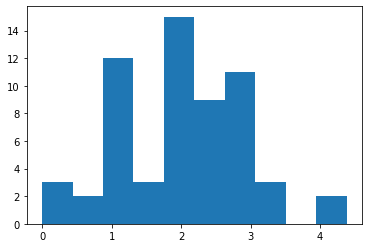

In [47]:
plt.hist(nox_boxcox[0])
plt.show()
#też poradziło sobie z pojedynczymi obserwacjami o dużych wartościach nox

In [49]:
#macierz X z przekształconym nox, zamiast pierwotnego nox
X = sm.add_constant(nox_boxcox[0],prepend = True,has_constant = 'add')
Y = pollution['mort']
m_boxcox = sm.OLS(endog = Y,exog = X).fit()
m_boxcox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   mort   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     6.795
Date:                Wed, 08 Jun 2022   Prob (F-statistic):             0.0116
Time:                        16:10:24   Log-Likelihood:                -329.14
No. Observations:                  60   AIC:                             662.3
Df Residuals:                      58   BIC:                             666.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        896.5674     18.464     48.557      0.000     859.607     933.528
x1            21.6882      8.320      2.607      0.012       5.034      38.343
==============================================================================
Omnibus:                        3.827   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.148   Jarque-Bera (JB):                3.100
Skew:                          -0.334   Prob(JB):                        0.212
Kurtosis:                       3.892   Cond. No.                         6.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

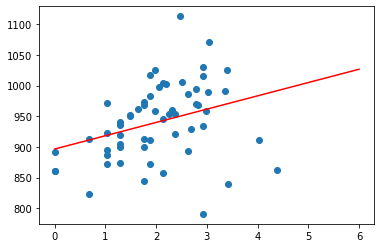

In [50]:
plt.scatter(nox_boxcox[0],pollution['mort'])
X_plot = np.linspace(0,6,6)
plt.plot(X_plot,X_plot*m_boxcox.params[1]+m_boxcox.params[0],color = 'red')
plt.show()
#dane są bardziej liniowe niż to co było na początku

Co w przypadku, gdy zmienna losowa, która chcielibyśmy przekształcić byłaby niedodatnia?

### Metoda Yeo-Johnsona

$$
    t_{\lambda}(z)=\left.
    \begin{cases}
    \frac{(y+1)^{\lambda} -1}{\lambda} \quad &\text{dla} \quad \lambda\neq 0, y\geq 0,\\
    \log(y+1) \quad &\text{dla} \quad \lambda= 0, y\geq0,\\
    -\frac{(-y+1)^{2-\lambda}-1}{2-\lambda} \quad &\text{dla} \quad \lambda\neq 2, y<0,\\
    -\log(-y+1) \quad &\text{dla} \quad \lambda= 2, y<0.
    \end{cases}\right.
$$

In [51]:
?stats.yeojohnson

# Zmienne kategoryczne

# Zadanie 3
Wczytaj dane `Salaries` z pakieru `carData` i dopasuj model `salary ~ sex`. Zwróć uwagę na kodowanie zmiennej `sex`. 

In [60]:
# http://www.sthda.com/english/articles/40-regression-analysis/163-regression-with-categorical-variables-dummy-coding-essentials-in-r/
salaries = sm.datasets.get_rdataset(dataname="Salaries", package="carData")
salaries.data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [61]:
y, X = dmatrices('salary ~ sex', data=salaries.data, return_type='dataframe')
X.head()

,Intercept,sex[T.Male]
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [62]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.738
Date:                Wed, 08 Jun 2022   Prob (F-statistic):            0.00567
Time:                        16:30:51   Log-Likelihood:                -4655.4
No. Observations:                 397   AIC:                             9315.
Df Residuals:                     395   BIC:                             9323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     1.01e+05   4809.386     21.001      0.000    9.15e+04     1.1e+05
sex[T.Male]  1.409e+04   5064.579      2.782      0.006    4131.107     2.4e+04
==============================================================================
Omnibus:                       28.630   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.087
Skew:                           0.703   Prob(JB):                     6.53e-08
Kurtosis:                       3.152   Cond. No.                         6.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Ważne:**

Gdy w danych występują zmienne kategoryczne, jak np. w tym przypadku zmienna `sex`, postępujemy z nią następująco

1. tworzymy, nową zmienną (ang. *dummy variable*), która

    **1**, gdy osoba jest mężczyzną,
    
    **0**, gdy osoba jest kobietą,
    
    
2. zmienna `sex` jest traktowana w równaniu regresji jako:

  $b_0 + b_1$ gdy osoba jest mężczyzną,

  $b_0$ gdy osoba jest kobietą.

teraz zmieniamy poziom referencyjny aby był nim Male wówczas zmienna sex jest traktowana w równaniu regresji jako:\
$c_0$ gdy osoba jest mężczyzną,\
$c_0+ c_1$ gdy osoba jest kobietą.\
Zatem $c_0 = b_0+b_1$ i $c_1 = b_0-c_0 = -b_1$

In [63]:
y, X = dmatrices('salary ~ C(sex, Treatment("Male"))', data=salaries.data, return_type='dataframe')
X.head()

,Intercept,"C(sex, Treatment(""Male""))[T.Female]"
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [64]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7.738
Date:                Wed, 08 Jun 2022   Prob (F-statistic):            0.00567
Time:                        16:31:01   Log-Likelihood:                -4655.4
No. Observations:                 397   AIC:                             9315.
Df Residuals:                     395   BIC:                             9323.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1.151e+05   1587.378     72.503      0.000    1.12e+05    1.18e+05
C(sex, Treatment("Male"))[T.Female] -1.409e+04   5064.579     -2.782      0.006    -2.4e+04   -4131.107
==============================================================================
Omnibus:                       28.630   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.087
Skew:                           0.703   Prob(JB):                     6.53e-08
Kurtosis:                       3.152   Cond. No.                         3.40
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Zadanie 3.1 
Sprawdź jak została zakodowana zmienna `ShelveLoc` w zbiorze danych `Carseats`. Zmień poziom wartości dla tej zmiennej, sprawdź różnice w modelu.

In [66]:
np.unique(carseats_df.ShelveLoc) #3 poziomy

array(['Bad', 'Good', 'Medium'], dtype=object)

In [67]:
y,X = dmatrices('Sales~ShelveLoc',data = carseats.data,return_type = "dataframe")
print(X.head())
print(carseats_df.ShelveLoc.head())
#jako referencyjny wzięty Bad

   Intercept  ShelveLoc[T.Good]  ShelveLoc[T.Medium]
0        1.0                0.0                  0.0
1        1.0                1.0                  0.0
2        1.0                0.0                  1.0
3        1.0                0.0                  1.0
4        1.0                0.0                  0.0
0       Bad
1      Good
2    Medium
3    Medium
4       Bad
Name: ShelveLoc, dtype: object


In [68]:
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.27e-33
Time:                        16:32:55   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5229      0.239     23.131      0.000       5.054       5.992
ShelveLoc[T.Good]       4.6911      0.348     13.464      0.000       4.006       5.376
ShelveLoc[T.Medium]     1.7837      0.286      6.229      0.000       1.221       2.347
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#bad - y=b_0
#medium - y = b0+b2
#good - y = b0+b1

In [70]:
y,X = dmatrices('Sales~C(ShelveLoc,Treatment("Good"))',data = carseats.data,return_type = "dataframe")
X.head() #zmieniamy poziom referencyjny na good

,Intercept,"C(ShelveLoc, Treatment(""Good""))[T.Bad]","C(ShelveLoc, Treatment(""Good""))[T.Medium]"
0,1.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,1.0,0.0


In [71]:
sm.OLS(y, X).fit().summary()
#mamy nowe współczynniki c_0,c_1 i c_2
#Wyrażają się one przez:
#good: y=c_0 = b_0+b_1
#medium: y=c_0+c_2 = b_0+b_2
#bad: y = c_0+c_1 = b_0
#Zatem:
# c_0 = b_0+b_1
# c_1 = -b_1
# c_2 = b_2-b_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     92.23
Date:                Wed, 08 Jun 2022   Prob (F-statistic):           1.27e-33
Time:                        16:44:12   Log-Likelihood:                -906.03
No. Observations:                 400   AIC:                             1818.
Df Residuals:                     397   BIC:                             1830.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    10.2140      0.254     40.253      0.000       9.715      10.713
C(ShelveLoc, Treatment("Good"))[T.Bad]       -4.6911      0.348    -13.464      0.000      -5.376      -4.006
C(ShelveLoc, Treatment("Good"))[T.Medium]    -2.9074      0.299     -9.725      0.000      -3.495      -2.320
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.092
Skew:                           0.033   Prob(JB):                        0.955
Kurtosis:                       2.966   Cond. No.                         4.78
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Zadanie 4
Napisz funkcję, która dla wybranej zmiennej niezależnej dopasuje model prostej liniowej postaci: `Sales ~ X`, gdzie `X` to wybrana zmienna. Następnie, korzystając z napisanej funkcji dopasuj model do każdej zmiennej niezależnej w zbiorze `Carseats`.

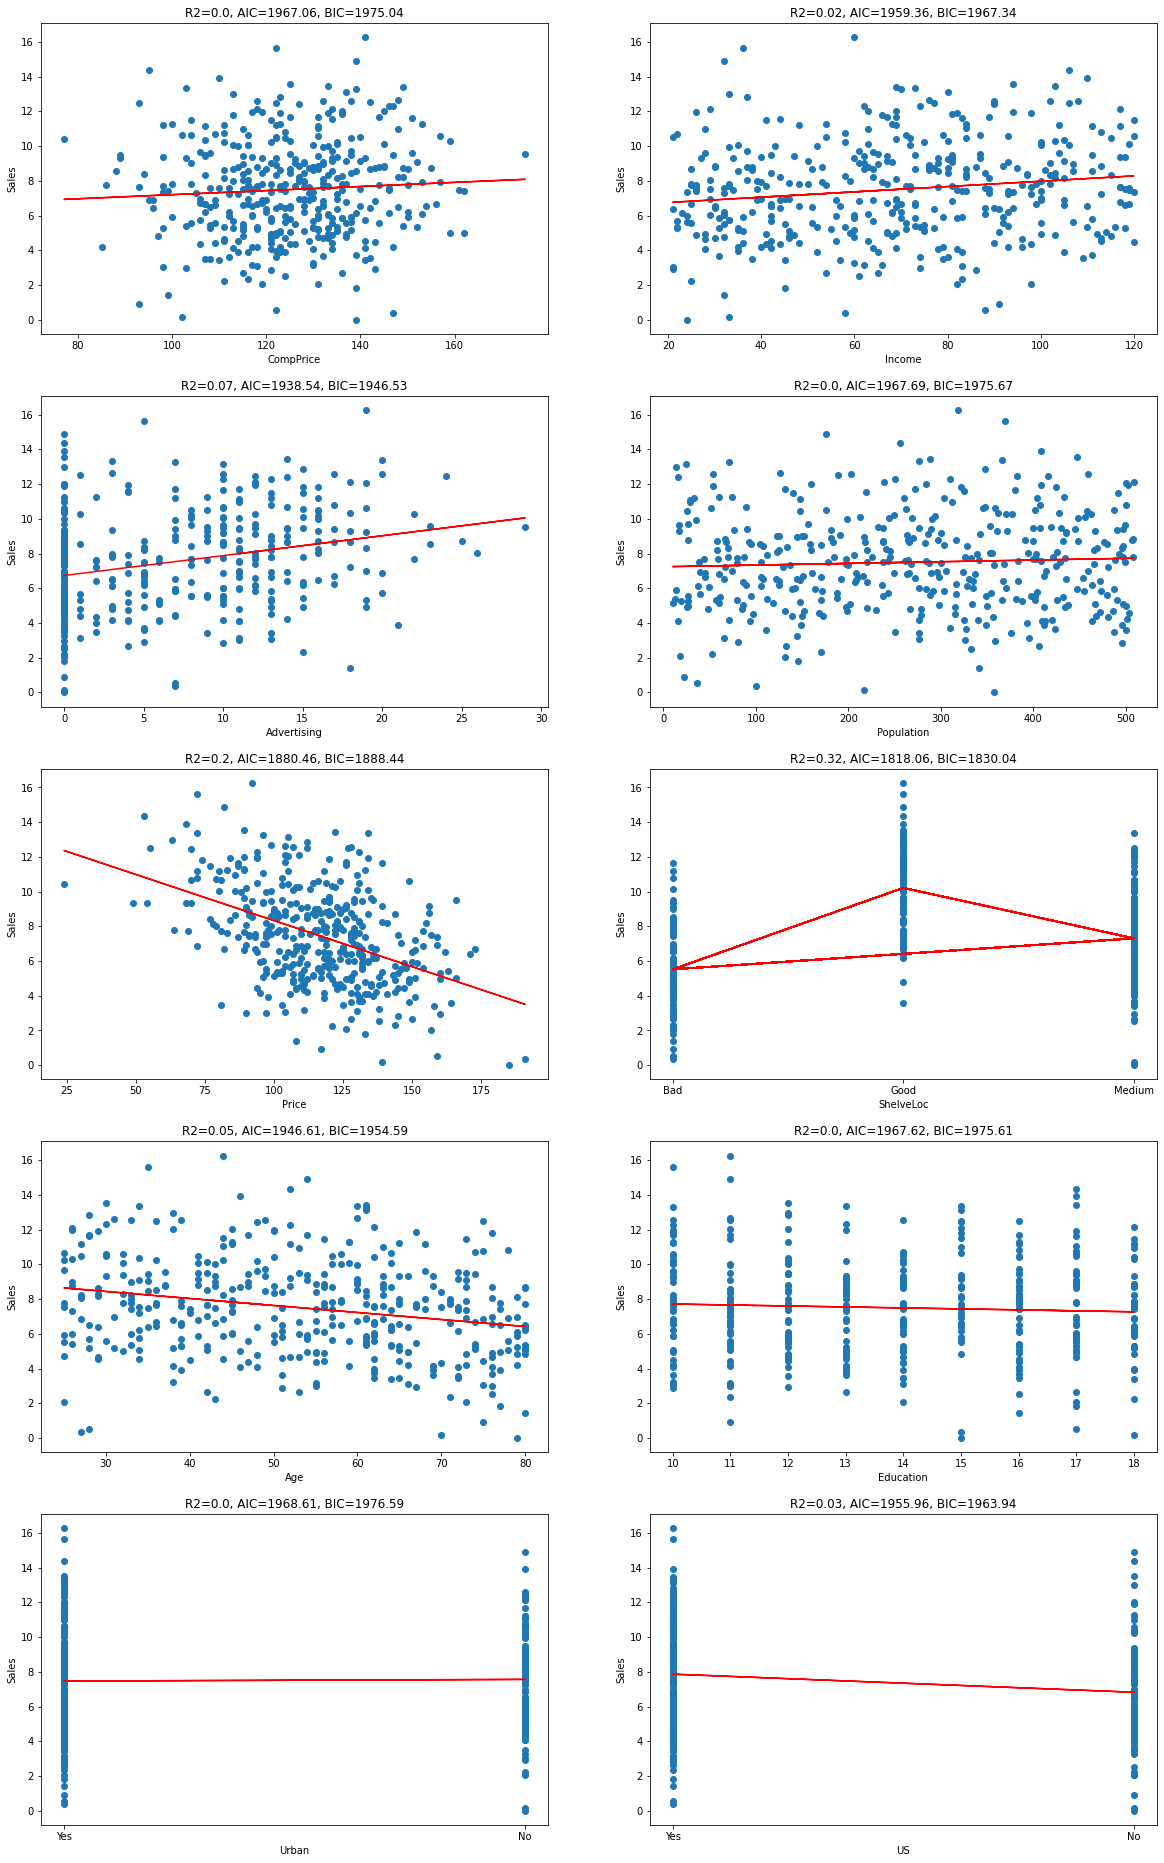

In [76]:
def XY_generator(col):
  return(dmatrices('Sales ~ {}'.format(col), data=carseats.data, return_type='dataframe'))

plt.figure(figsize=(20, 40))

columns = carseats_df.columns[carseats_df.columns != 'Sales']

for i, col in enumerate(columns):
    #dopasowujemy dla zmiennej zależnej Sales  jedną kolumnę z danych (w każdym obrocie inną)
    Y, X = XY_generator(col)

    plt.subplot(len(columns) // 2 + 1, 2, i+1)
    #rysujemy wykres rozproszenia dla każdej pary zmienna niezależna vs zmienna zależna
    plt.scatter(carseats_df[col], Y, marker='o')
    
    #dopasowujemy model jednej zmiennej
    model = sm.OLS(endog=Y, exog=X)
    fitted_model = model.fit()
    plt.plot(carseats_df[col], fitted_model.fittedvalues, color='red')
    
    plt.xlabel(col)
    plt.ylabel('Sales')
    #dopisujemy charakterystyki danych modeli R^2 im większe tym lepiej,
    #AIC i BIC im mniej tym lepiej
    plt.title("R2={}, AIC={}, BIC={}".format(np.round(fitted_model.rsquared, 2), 
                                            np.round(fitted_model.aic, 2),
                                            np.round(fitted_model.bic, 2)))